In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_19204\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

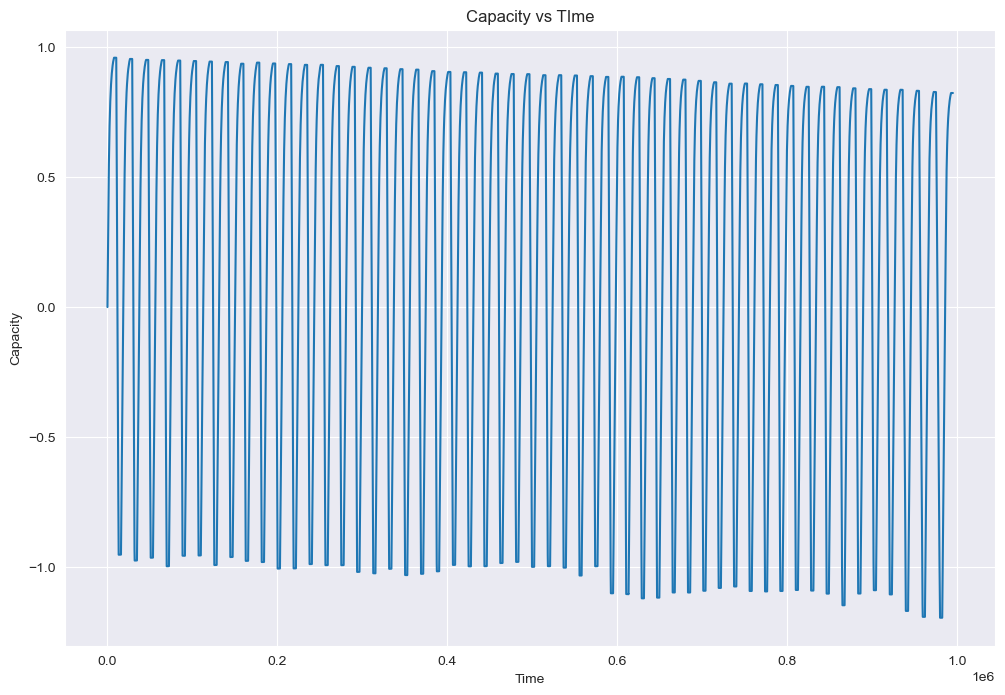

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

In [13]:
# %%time
# from scipy.signal import argrelextrema
# import numpy as np

# ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
# ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

# df.Capacity.plot(figsize=(20,12), alpha=.3)
# # filter prices that are peaks and plot them differently to be visable on the plot
# df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
# df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
# plt.ylabel("Capacity")
# plt.xlabel("Time")
# plt.title('Local Maxima and Local Minima')

In [14]:
# maximum_point = df['Capacity'][ilocs_max].unique()
# minimum_point = df['Capacity'][ilocs_min].unique()

In [15]:
# print(maximum_point)
# print(maximum_point.max())
# print(minimum_point)

In [16]:
# df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [17]:
df.head(20)

,Time,Potential,Current,Capacity,Charge
0,0.5,3.94214,1.24797,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.81737
2,2.0,3.94806,1.24790,0.000601,2.16510
3,3.0,3.95068,1.24790,0.000927,3.33812
4,4.0,3.95281,1.24790,0.001298,4.67338
5,5.0,3.95467,1.24789,0.001624,5.84639
6,6.0,3.95637,1.24791,0.001995,7.18165
7,7.0,3.95793,1.24789,0.002321,8.35467
8,8.0,3.95938,1.24790,0.002692,9.68992
9,9.0,3.96077,1.24789,0.003017,10.86290


# Integral current

In [18]:
# from scipy.integrate import cumulative_trapezoid

# p = df["Time"][:df.shape[0]]
# q = df["Current"][:df.shape[0]]

# integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

# df.loc[:, "Integral_current"] = integral

In [19]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
# plt.plot(df['Integral_current'],color='green')
# plt.ylabel('Integral_Current')
# plt.xlabel('Time')
# plt.legend(["Soc", "Integral current"], loc ="upper left")
# plt.title('Dataset')

In [20]:
df.head()

,Time,Potential,Current,Capacity,Charge
0,0.5,3.94214,1.24797,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.81737
2,2.0,3.94806,1.24790,0.000601,2.16510
3,3.0,3.95068,1.24790,0.000927,3.33812
4,4.0,3.95281,1.24790,0.001298,4.67338


In [21]:
df.insert(loc = 5,column ='Energy',value=df["Potential"]*df['Capacity']) # do add if needed 

In [22]:
df.describe()

,Time,Potential,Current,Capacity,Charge,Energy
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,527.461697,0.791004
std,288767.217690,0.382038,1.142440,0.752569,2709.247496,2.873298
min,0.500000,2.750290,-2.503150,-1.195086,-4302.310000,-4.306315
25%,250933.600000,3.475400,0.000000,-0.602635,-2169.485000,-2.131484
50%,501905.600000,4.147310,0.072232,0.455186,1638.670000,1.808352
75%,751231.300000,4.199370,0.795196,0.839904,3023.655000,3.514851
max,999999.600000,4.199950,1.364510,0.959319,3453.550000,4.028483


In [23]:
df.head()

,Time,Potential,Current,Capacity,Charge,Energy
0,0.5,3.94214,1.24797,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.81737,0.000896
2,2.0,3.94806,1.24790,0.000601,2.16510,0.002374
3,3.0,3.95068,1.24790,0.000927,3.33812,0.003663
4,4.0,3.95281,1.24790,0.001298,4.67338,0.005131


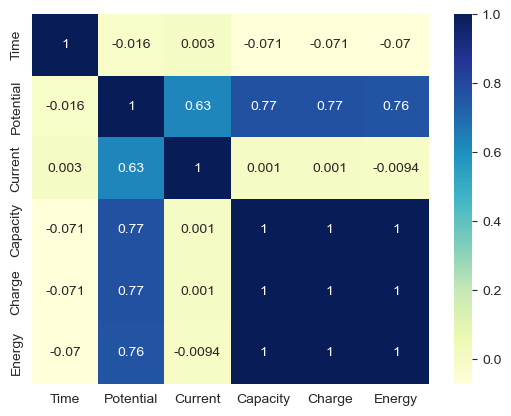

<Figure size 1400x1000 with 0 Axes>

In [24]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [25]:
# timest = df.pop('Time')
# soc = df.pop('SOC')
Charge = df.pop('Charge')

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Capacity'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [27]:
df.head()

,Time,Potential,Current,Capacity,Energy
0,0.000000e+00,0.822158,0.969868,0.554717,0.000000
1,5.000005e-07,0.824159,0.969847,0.554823,0.000896
2,1.500001e-06,0.826242,0.969850,0.554996,0.002374
3,2.500002e-06,0.828049,0.969850,0.555148,0.003663
4,3.500003e-06,0.829519,0.969850,0.555320,0.005131


In [28]:
Y = df.pop('Energy')
X = df

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [30]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 4), (198976, 4), (795903,), (198976,))

In [31]:
X_train.head()

,Time,Potential,Current,Capacity
330504,0.333405,0.218555,0.000212,0.352448
726663,0.731733,0.999621,0.847168,0.804669
722757,0.727827,0.709077,0.969638,0.195888
282975,0.285532,0.999634,0.798766,0.848406
260756,0.263142,0.788985,0.969759,0.342038


In [32]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [35]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [115]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(100,activation = 'linear'),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=16,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
49744/49744 [==============================] - 73s 1ms/step - loss: 0.1138 - rmse: 0.2203 - mae: 0.1138 - mse: 0.0485 - mape: 246.1810 - val_loss: 0.1076 - val_rmse: 0.2065 - val_mae: 0.1076 - val_mse: 0.0426 - val_mape: 23.7943
Epoch 2/100
49744/49744 [==============================] - 66s 1ms/step - loss: 0.1080 - rmse: 0.2036 - mae: 0.1080 - mse: 0.0415 - mape: 152.4380 - val_loss: 0.1080 - val_rmse: 0.2065 - val_mae: 0.1080 - val_mse: 0.0426 - val_mape: 24.3565
Epoch 3/100
49744/49744 [==============================] - 69s 1ms/step - loss: 0.1074 - rmse: 0.2038 - mae: 0.1074 - mse: 0.0415 - mape: 188.5991 - val_loss: 0.1069 - val_rmse: 0.2026 - val_mae: 0.1069 - val_mse: 0.0410 - val_mape: 23.4538
Epoch 4/100
49744/49744 [==============================] - 71s 1ms/step - loss: 0.1072 - rmse: 0.2038 - mae: 0.1072 - mse: 0.0415 - mape: 173.8696 - val_loss: 0.1078 - val_rmse: 0.2059 - val_mae: 0.1078 - val_mse: 0.0424 - val_mape: 24.4281
Epoch 5/100
49744/49744 [===========

Epoch 35/100
49744/49744 [==============================] - 125s 3ms/step - loss: 0.1065 - rmse: 0.2040 - mae: 0.1065 - mse: 0.0416 - mape: 169.8336 - val_loss: 0.1067 - val_rmse: 0.2043 - val_mae: 0.1067 - val_mse: 0.0417 - val_mape: 23.7277
Epoch 36/100
49744/49744 [==============================] - 100s 2ms/step - loss: 0.1065 - rmse: 0.2040 - mae: 0.1065 - mse: 0.0416 - mape: 166.4929 - val_loss: 0.1067 - val_rmse: 0.2048 - val_mae: 0.1067 - val_mse: 0.0419 - val_mape: 23.7108
Epoch 37/100
49744/49744 [==============================] - 99s 2ms/step - loss: 0.1065 - rmse: 0.2040 - mae: 0.1065 - mse: 0.0416 - mape: 167.6906 - val_loss: 0.1069 - val_rmse: 0.2059 - val_mae: 0.1069 - val_mse: 0.0424 - val_mape: 24.3120
Epoch 38/100
49744/49744 [==============================] - 99s 2ms/step - loss: 0.1065 - rmse: 0.2040 - mae: 0.1065 - mse: 0.0416 - mape: 161.8079 - val_loss: 0.1066 - val_rmse: 0.2050 - val_mae: 0.1066 - val_mse: 0.0420 - val_mape: 23.9798
Epoch 39/100
49744/49744 [====

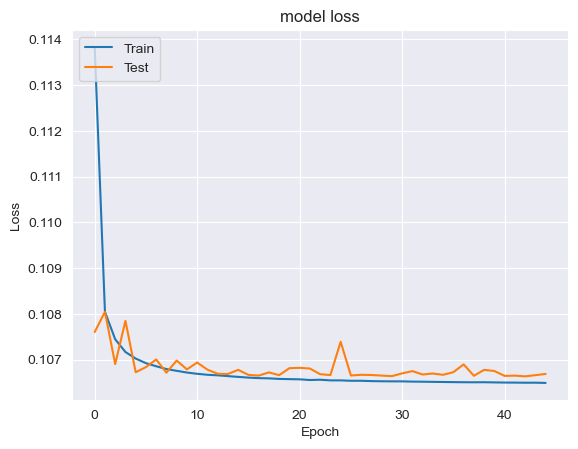

In [116]:
plot_his(history_1)

In [117]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1067 - rmse: 0.2045 - mae: 0.1067 - mse: 0.0418 - mape: 23.7268


[0.1066850945353508,
 0.20447784662246704,
 0.1066850945353508,
 0.04181118682026863,
 23.72675132751465]

In [118]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


In [119]:
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 100)               500       
                                                                 
 dense_38 (Dense)            (None, 50)                5050      
                                                                 
 dense_39 (Dense)            (None, 5)                 255       
                                                                 
 dense_40 (Dense)            (None, 1)                 6         
                                                                 
Total params: 5,811
Trainable params: 5,811
Non-trainable params: 0
_________________________________________________________________


In [120]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  11636.086


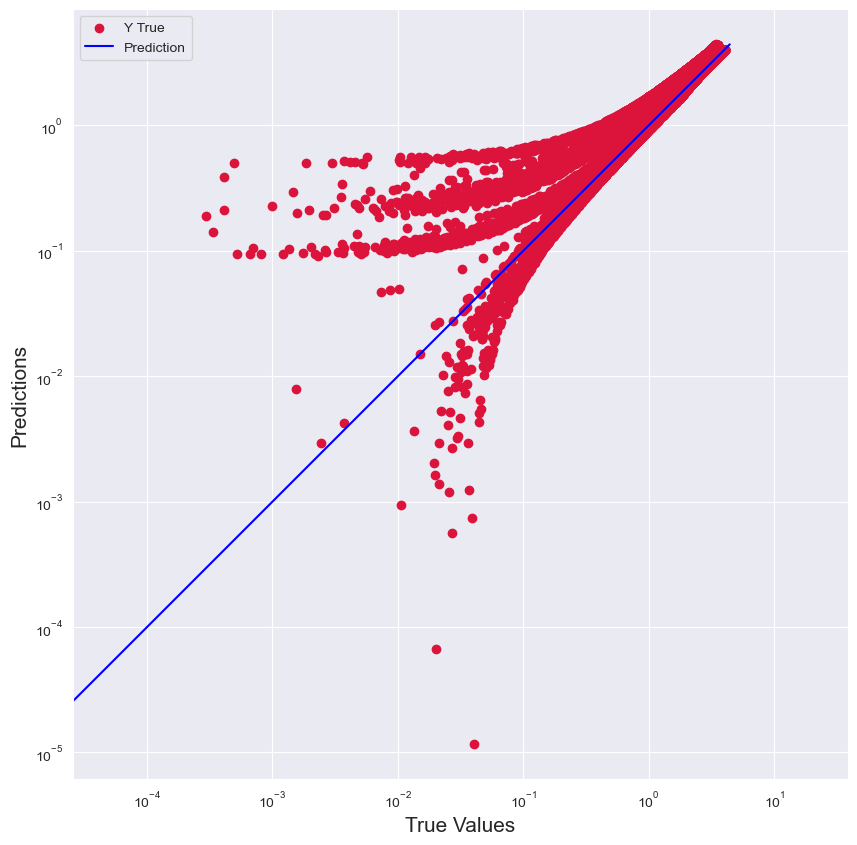

In [151]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_1), max(Y_test))
p2 = min(min(Y_pred_1), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [121]:
model_1.save('Saved_models/model_1_Energyesti.h5')

# Model 2

In [122]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(5,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 48s 2ms/step - loss: 0.0371 - rmse: 0.1679 - mae: 0.0371 - mse: 0.0282 - mape: 166.0487 - val_loss: 0.0238 - val_rmse: 0.0409 - val_mae: 0.0238 - val_mse: 0.0017 - val_mape: 4.2413
Epoch 2/100
24872/24872 [==============================] - 48s 2ms/step - loss: 0.0237 - rmse: 0.0396 - mae: 0.0237 - mse: 0.0016 - mape: 127.3262 - val_loss: 0.0230 - val_rmse: 0.0395 - val_mae: 0.0230 - val_mse: 0.0016 - val_mape: 4.3538
Epoch 3/100
24872/24872 [==============================] - 48s 2ms/step - loss: 0.0229 - rmse: 0.0386 - mae: 0.0229 - mse: 0.0015 - mape: 123.1225 - val_loss: 0.0224 - val_rmse: 0.0386 - val_mae: 0.0224 - val_mse: 0.0015 - val_mape: 4.2177
Epoch 4/100
24872/24872 [==============================] - 48s 2ms/step - loss: 0.0223 - rmse: 0.0378 - mae: 0.0223 - mse: 0.0014 - mape: 116.2128 - val_loss: 0.0219 - val_rmse: 0.0373 - val_mae: 0.0219 - val_mse: 0.0014 - val_mape: 4.5179
Epoch 5/100
24872/24872 [===============

24872/24872 [==============================] - 44s 2ms/step - loss: 0.0149 - rmse: 0.0265 - mae: 0.0149 - mse: 7.0221e-04 - mape: 92.0809 - val_loss: 0.0150 - val_rmse: 0.0266 - val_mae: 0.0150 - val_mse: 7.0950e-04 - val_mape: 3.9874
Epoch 35/100
24872/24872 [==============================] - 43s 2ms/step - loss: 0.0148 - rmse: 0.0264 - mae: 0.0148 - mse: 6.9497e-04 - mape: 90.8840 - val_loss: 0.0149 - val_rmse: 0.0265 - val_mae: 0.0149 - val_mse: 7.0045e-04 - val_mape: 3.9770
Epoch 36/100
24872/24872 [==============================] - 44s 2ms/step - loss: 0.0147 - rmse: 0.0262 - mae: 0.0147 - mse: 6.8869e-04 - mape: 91.7353 - val_loss: 0.0148 - val_rmse: 0.0264 - val_mae: 0.0148 - val_mse: 6.9713e-04 - val_mape: 4.0126
Epoch 37/100
24872/24872 [==============================] - 43s 2ms/step - loss: 0.0147 - rmse: 0.0261 - mae: 0.0147 - mse: 6.8276e-04 - mape: 92.8589 - val_loss: 0.0147 - val_rmse: 0.0262 - val_mae: 0.0147 - val_mse: 6.8866e-04 - val_mape: 4.0437
Epoch 38/100
24872/24

24872/24872 [==============================] - 30s 1ms/step - loss: 0.0123 - rmse: 0.0233 - mae: 0.0123 - mse: 5.4459e-04 - mape: 78.5202 - val_loss: 0.0123 - val_rmse: 0.0234 - val_mae: 0.0123 - val_mse: 5.4654e-04 - val_mape: 4.6342
Epoch 68/100
24872/24872 [==============================] - 30s 1ms/step - loss: 0.0122 - rmse: 0.0232 - mae: 0.0122 - mse: 5.3953e-04 - mape: 78.8317 - val_loss: 0.0122 - val_rmse: 0.0233 - val_mae: 0.0122 - val_mse: 5.4187e-04 - val_mape: 4.6418
Epoch 69/100
24872/24872 [==============================] - 31s 1ms/step - loss: 0.0122 - rmse: 0.0231 - mae: 0.0122 - mse: 5.3467e-04 - mape: 78.6703 - val_loss: 0.0122 - val_rmse: 0.0232 - val_mae: 0.0122 - val_mse: 5.3670e-04 - val_mape: 4.7081
Epoch 70/100
24872/24872 [==============================] - 30s 1ms/step - loss: 0.0121 - rmse: 0.0230 - mae: 0.0121 - mse: 5.3060e-04 - mape: 78.9565 - val_loss: 0.0121 - val_rmse: 0.0231 - val_mae: 0.0121 - val_mse: 5.3211e-04 - val_mape: 4.7121
Epoch 71/100
24872/24

24872/24872 [==============================] - 31s 1ms/step - loss: 0.0115 - rmse: 0.0222 - mae: 0.0115 - mse: 4.9333e-04 - mape: 82.7000 - val_loss: 0.0115 - val_rmse: 0.0222 - val_mae: 0.0115 - val_mse: 4.9275e-04 - val_mape: 3.8005
CPU times: total: 1h 41min 54s
Wall time: 1h 48s


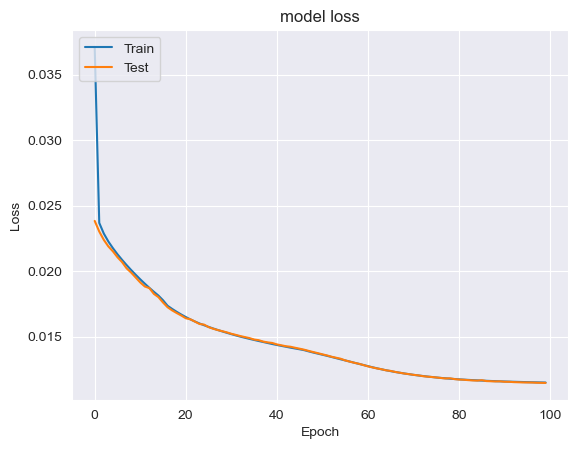

In [123]:
plot_his(history_2)

In [124]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 5s 807us/step - loss: 0.0115 - rmse: 0.0222 - mae: 0.0115 - mse: 4.9275e-04 - mape: 3.8005


[0.01145716942846775,
 0.022198069840669632,
 0.01145716942846775,
 0.0004927542759105563,
 3.8004608154296875]

In [125]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 4s 646us/step


In [126]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  8335.977


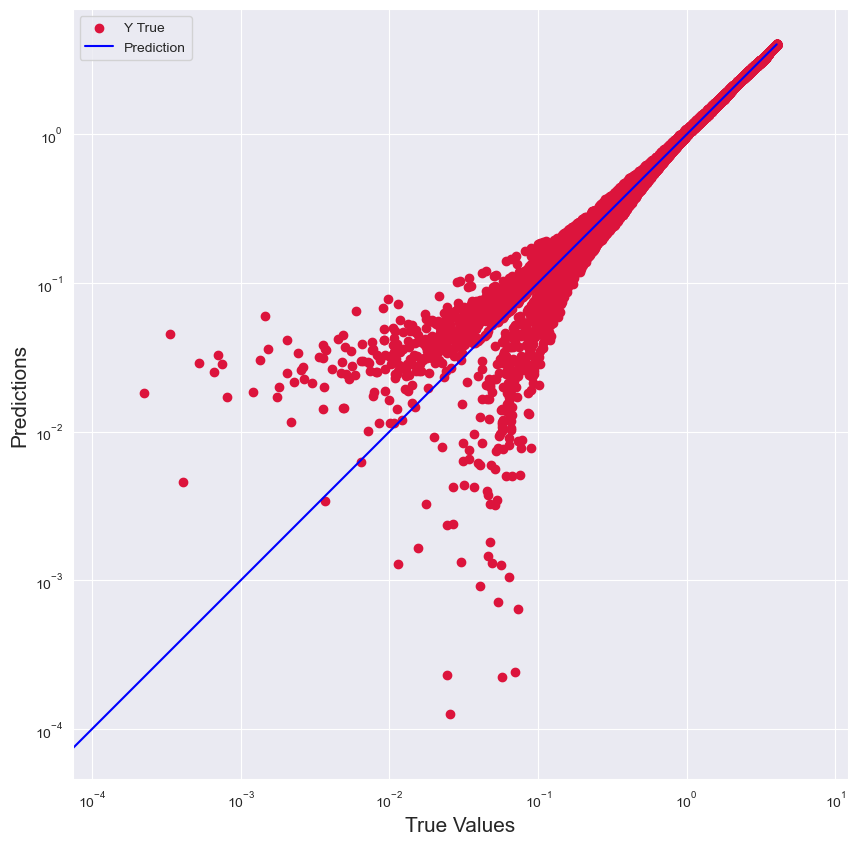

In [150]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_2), max(Y_test))
p2 = min(min(Y_pred_2), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [127]:
model_2.save('Saved_models/model_2_Energyesti.h5')

# Model 3

In [187]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(15),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=64, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
12436/12436 [==============================] - 25s 2ms/step - loss: 0.1234 - rmse: 0.2739 - mae: 0.1234 - mse: 0.0750 - mape: 197.5453 - val_loss: 0.1092 - val_rmse: 0.2077 - val_mae: 0.1092 - val_mse: 0.0431 - val_mape: 24.5642
Epoch 2/100
12436/12436 [==============================] - 22s 2ms/step - loss: 0.1086 - rmse: 0.2035 - mae: 0.1086 - mse: 0.0414 - mape: 127.9621 - val_loss: 0.1135 - val_rmse: 0.2108 - val_mae: 0.1135 - val_mse: 0.0444 - val_mape: 26.1380
Epoch 3/100
12436/12436 [==============================] - 22s 2ms/step - loss: 0.1080 - rmse: 0.2037 - mae: 0.1080 - mse: 0.0415 - mape: 188.5701 - val_loss: 0.1077 - val_rmse: 0.2044 - val_mae: 0.1077 - val_mse: 0.0418 - val_mape: 23.9387
Epoch 4/100
12436/12436 [==============================] - 22s 2ms/step - loss: 0.1076 - rmse: 0.2037 - mae: 0.1076 - mse: 0.0415 - mape: 166.8494 - val_loss: 0.1070 - val_rmse: 0.2035 - val_mae: 0.1070 - val_mse: 0.0414 - val_mape: 23.7253
Epoch 5/100
12436/12436 [===========

Epoch 35/100
12436/12436 [==============================] - 28s 2ms/step - loss: 0.1066 - rmse: 0.2039 - mae: 0.1066 - mse: 0.0416 - mape: 168.1118 - val_loss: 0.1067 - val_rmse: 0.2045 - val_mae: 0.1067 - val_mse: 0.0418 - val_mape: 23.6834
Epoch 36/100
12436/12436 [==============================] - 23s 2ms/step - loss: 0.1066 - rmse: 0.2040 - mae: 0.1066 - mse: 0.0416 - mape: 162.5888 - val_loss: 0.1067 - val_rmse: 0.2049 - val_mae: 0.1067 - val_mse: 0.0420 - val_mape: 23.6840
Epoch 37/100
12436/12436 [==============================] - 21s 2ms/step - loss: 0.1066 - rmse: 0.2040 - mae: 0.1066 - mse: 0.0416 - mape: 175.3324 - val_loss: 0.1074 - val_rmse: 0.2068 - val_mae: 0.1074 - val_mse: 0.0427 - val_mape: 24.5349
Epoch 38/100
12436/12436 [==============================] - 19s 2ms/step - loss: 0.1066 - rmse: 0.2040 - mae: 0.1066 - mse: 0.0416 - mape: 161.0624 - val_loss: 0.1067 - val_rmse: 0.2053 - val_mae: 0.1067 - val_mse: 0.0422 - val_mape: 23.9778
Epoch 39/100
12436/12436 [======

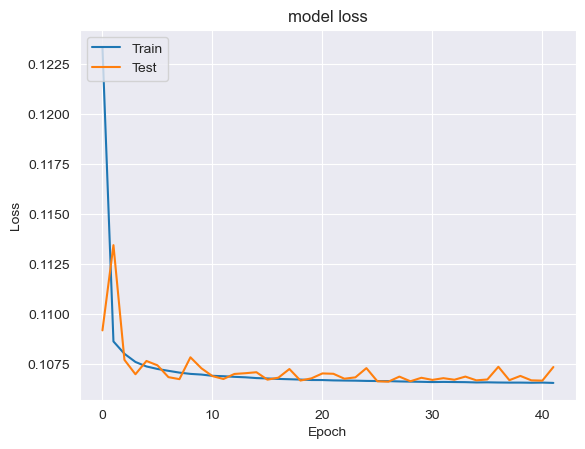

In [188]:
plot_his(history_3)

In [189]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 6s 975us/step - loss: 0.1074 - rmse: 0.2068 - mae: 0.1074 - mse: 0.0428 - mape: 24.4529


[0.10736678540706635,
 0.20682650804519653,
 0.10736678540706635,
 0.042777206748723984,
 24.452911376953125]

In [190]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 5s 747us/step


In [191]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  2996.0984


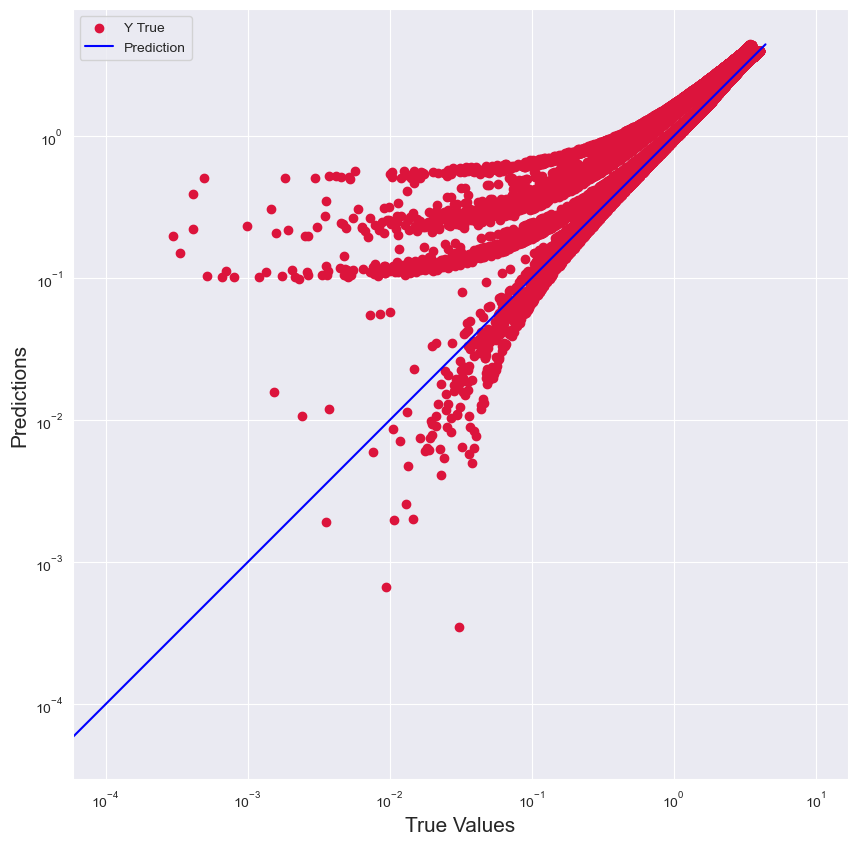

In [192]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_3, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_3), max(Y_test))
p2 = min(min(Y_pred_3), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [193]:
model_3.save('Saved_models/model_3_Energyesti.h5')

# Model 4

In [55]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0166 - rmse: 0.0991 - mae: 0.0166 - mse: 0.0098 - mape: 37.2861 - val_loss: 0.0064 - val_rmse: 0.0115 - val_mae: 0.0064 - val_mse: 1.3325e-04 - val_mape: 1.2735
Epoch 2/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0067 - rmse: 0.0116 - mae: 0.0067 - mse: 1.3412e-04 - mape: 31.9259 - val_loss: 0.0061 - val_rmse: 0.0110 - val_mae: 0.0061 - val_mse: 1.2146e-04 - val_mape: 1.3274
Epoch 3/100
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0062 - rmse: 0.0111 - mae: 0.0062 - mse: 1.2306e-04 - mape: 28.5773 - val_loss: 0.0063 - val_rmse: 0.0108 - val_mae: 0.0063 - val_mse: 1.1727e-04 - val_mape: 1.4506
Epoch 4/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0059 - rmse: 0.0109 - mae: 0.0059 - mse: 1.1802e-04 - mape: 26.2832 - val_loss: 0.0056 - val_rmse: 0.0106 - val_mae: 0.0056 - val_mse: 1.1327e-04 - val_mape: 1.3932
Epoch 5/100
2487

24872/24872 [==============================] - 81s 3ms/step - loss: 0.0047 - rmse: 0.0095 - mae: 0.0047 - mse: 9.1108e-05 - mape: 11.2700 - val_loss: 0.0046 - val_rmse: 0.0095 - val_mae: 0.0046 - val_mse: 8.9810e-05 - val_mape: 0.9089
Epoch 35/100
24872/24872 [==============================] - 87s 4ms/step - loss: 0.0046 - rmse: 0.0095 - mae: 0.0046 - mse: 9.0655e-05 - mape: 9.9730 - val_loss: 0.0047 - val_rmse: 0.0094 - val_mae: 0.0047 - val_mse: 8.9164e-05 - val_mape: 0.8938
Epoch 36/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0046 - rmse: 0.0095 - mae: 0.0046 - mse: 9.0147e-05 - mape: 9.9280 - val_loss: 0.0046 - val_rmse: 0.0094 - val_mae: 0.0046 - val_mse: 8.8280e-05 - val_mape: 0.9127
Epoch 37/100
24872/24872 [==============================] - 87s 3ms/step - loss: 0.0046 - rmse: 0.0095 - mae: 0.0046 - mse: 8.9716e-05 - mape: 9.0526 - val_loss: 0.0046 - val_rmse: 0.0094 - val_mae: 0.0046 - val_mse: 8.7767e-05 - val_mape: 0.8989
Epoch 38/100
24872/24872

24872/24872 [==============================] - 86s 3ms/step - loss: 0.0041 - rmse: 0.0084 - mae: 0.0041 - mse: 6.9890e-05 - mape: 1.2158 - val_loss: 0.0041 - val_rmse: 0.0083 - val_mae: 0.0041 - val_mse: 6.9110e-05 - val_mape: 0.6820
Epoch 68/100
24872/24872 [==============================] - 84s 3ms/step - loss: 0.0041 - rmse: 0.0083 - mae: 0.0041 - mse: 6.9388e-05 - mape: 1.4836 - val_loss: 0.0041 - val_rmse: 0.0083 - val_mae: 0.0041 - val_mse: 6.8674e-05 - val_mape: 0.6808
Epoch 69/100
24872/24872 [==============================] - 85s 3ms/step - loss: 0.0041 - rmse: 0.0083 - mae: 0.0041 - mse: 6.8946e-05 - mape: 1.1327 - val_loss: 0.0041 - val_rmse: 0.0083 - val_mae: 0.0041 - val_mse: 6.8232e-05 - val_mape: 0.6751
Epoch 70/100
24872/24872 [==============================] - 85s 3ms/step - loss: 0.0041 - rmse: 0.0083 - mae: 0.0041 - mse: 6.8544e-05 - mape: 1.2334 - val_loss: 0.0040 - val_rmse: 0.0082 - val_mae: 0.0040 - val_mse: 6.7866e-05 - val_mape: 0.6706
Epoch 71/100
24872/24872 

24872/24872 [==============================] - 82s 3ms/step - loss: 0.0037 - rmse: 0.0075 - mae: 0.0037 - mse: 5.5825e-05 - mape: 6.0491 - val_loss: 0.0036 - val_rmse: 0.0074 - val_mae: 0.0036 - val_mse: 5.5233e-05 - val_mape: 0.6439
CPU times: total: 3h 16min 32s
Wall time: 2h 15min 59s


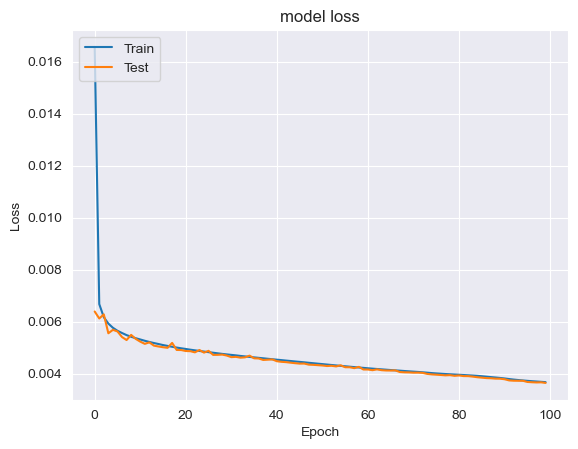

In [56]:
plot_his(history_4)

In [57]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 14s 2ms/step - loss: 0.0036 - rmse: 0.0074 - mae: 0.0036 - mse: 5.5233e-05 - mape: 0.6439


[0.0036446484737098217,
 0.0074318754486739635,
 0.0036446484737098217,
 5.5232772865565494e-05,
 0.6439046859741211]

In [58]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [59]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  32355.975


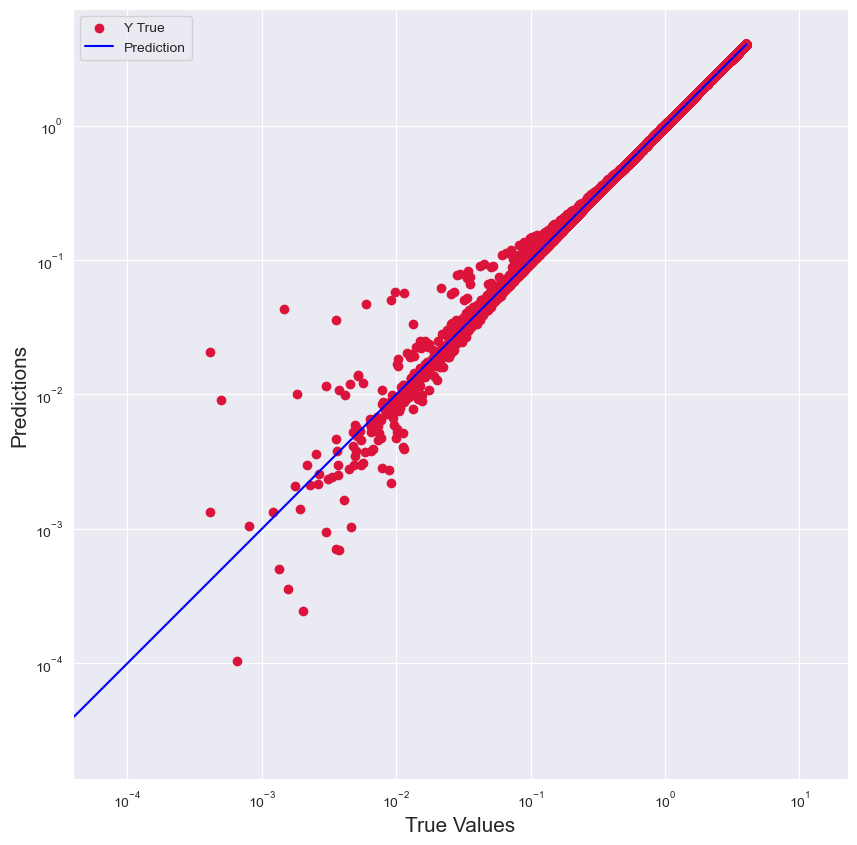

In [148]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_4, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_4), max(Y_test))
p2 = min(min(Y_pred_4), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [60]:
model_4.save('Saved_models/model_4_Energyesti.h5')

# Model 5

In [61]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=60,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/60
24872/24872 [==============================] - 179s 7ms/step - loss: 0.0705 - rmse: 0.3342 - mae: 0.0705 - mse: 0.1117 - mape: 199.7821 - val_loss: 0.0145 - val_rmse: 0.0201 - val_mae: 0.0145 - val_mse: 4.0405e-04 - val_mape: 1.5613
Epoch 2/60
24872/24872 [==============================] - 170s 7ms/step - loss: 0.0116 - rmse: 0.0173 - mae: 0.0116 - mse: 2.9990e-04 - mape: 26.3593 - val_loss: 0.0073 - val_rmse: 0.0126 - val_mae: 0.0073 - val_mse: 1.5980e-04 - val_mape: 0.6725
Epoch 3/60
24872/24872 [==============================] - 171s 7ms/step - loss: 0.0078 - rmse: 0.0121 - mae: 0.0078 - mse: 1.4685e-04 - mape: 14.5879 - val_loss: 0.0060 - val_rmse: 0.0097 - val_mae: 0.0060 - val_mse: 9.3269e-05 - val_mape: 1.1162
Epoch 4/60
24872/24872 [==============================] - 166s 7ms/step - loss: 0.0059 - rmse: 0.0092 - mae: 0.0059 - mse: 8.4060e-05 - mape: 21.6180 - val_loss: 0.0051 - val_rmse: 0.0077 - val_mae: 0.0051 - val_mse: 5.8657e-05 - val_mape: 0.8682
Epoch 5/60
2487

24872/24872 [==============================] - 183s 7ms/step - loss: 0.0011 - rmse: 0.0022 - mae: 0.0011 - mse: 4.7195e-06 - mape: 12.6994 - val_loss: 0.0012 - val_rmse: 0.0023 - val_mae: 0.0012 - val_mse: 5.0732e-06 - val_mape: 0.2445
Epoch 35/60
24872/24872 [==============================] - 177s 7ms/step - loss: 0.0010 - rmse: 0.0022 - mae: 0.0010 - mse: 4.6458e-06 - mape: 11.0175 - val_loss: 0.0011 - val_rmse: 0.0021 - val_mae: 0.0011 - val_mse: 4.5400e-06 - val_mape: 0.2218
Epoch 36/60
24872/24872 [==============================] - 179s 7ms/step - loss: 0.0010 - rmse: 0.0021 - mae: 0.0010 - mse: 4.6092e-06 - mape: 11.9082 - val_loss: 9.1613e-04 - val_rmse: 0.0021 - val_mae: 9.1613e-04 - val_mse: 4.4285e-06 - val_mape: 0.2063
Epoch 37/60
24872/24872 [==============================] - 179s 7ms/step - loss: 0.0010 - rmse: 0.0021 - mae: 0.0010 - mse: 4.5580e-06 - mape: 11.0231 - val_loss: 9.2278e-04 - val_rmse: 0.0021 - val_mae: 9.2278e-04 - val_mse: 4.2614e-06 - val_mape: 0.1922
Epoc

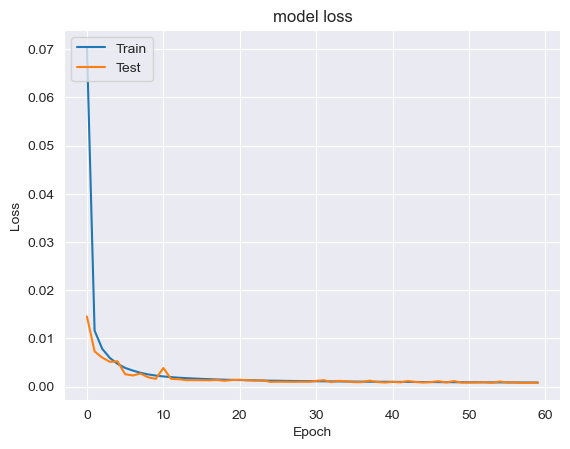

In [62]:
plot_his(history_5)

In [63]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 15s 2ms/step - loss: 8.0752e-04 - rmse: 0.0020 - mae: 8.0752e-04 - mse: 3.9980e-06 - mape: 0.1995


[0.0008075249497778714,
 0.0019994883332401514,
 0.0008075249497778714,
 3.997953626821982e-06,
 0.1995273232460022]

In [64]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 13s 2ms/step


In [66]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25715.975


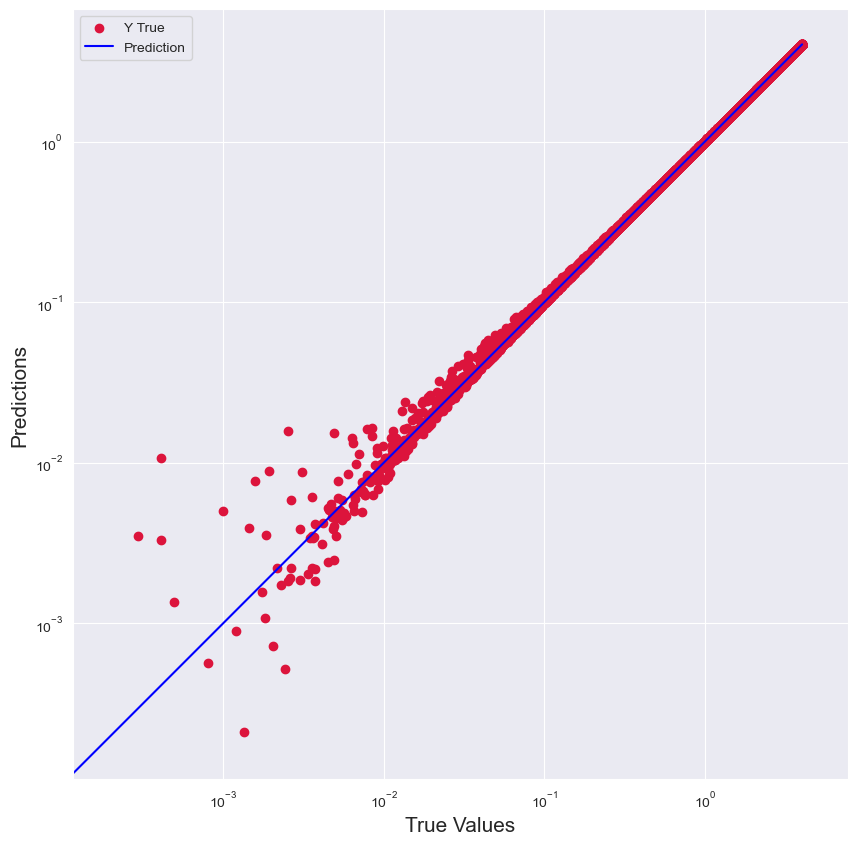

In [147]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_5, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_5), max(Y_test))
p2 = min(min(prediction_5), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [67]:
model_5.save('Saved_models/model_5_Energyesti.h5')

# Model 6

In [68]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 152s 6ms/step - loss: 0.0459 - rmse: 0.2550 - mae: 0.0459 - mse: 0.0650 - mape: 51.8837 - val_loss: 0.0068 - val_rmse: 0.0122 - val_mae: 0.0068 - val_mse: 1.4868e-04 - val_mape: 1.5248
Epoch 2/40
24872/24872 [==============================] - 147s 6ms/step - loss: 0.0081 - rmse: 0.0119 - mae: 0.0081 - mse: 1.4108e-04 - mape: 6.3179 - val_loss: 0.0075 - val_rmse: 0.0091 - val_mae: 0.0075 - val_mse: 8.3200e-05 - val_mape: 1.2999
Epoch 3/40
24872/24872 [==============================] - 147s 6ms/step - loss: 0.0053 - rmse: 0.0076 - mae: 0.0053 - mse: 5.7189e-05 - mape: 8.5979 - val_loss: 0.0052 - val_rmse: 0.0064 - val_mae: 0.0052 - val_mse: 4.0877e-05 - val_mape: 0.8482
Epoch 4/40
24872/24872 [==============================] - 147s 6ms/step - loss: 0.0039 - rmse: 0.0054 - mae: 0.0039 - mse: 2.9230e-05 - mape: 6.1560 - val_loss: 0.0038 - val_rmse: 0.0047 - val_mae: 0.0038 - val_mse: 2.2062e-05 - val_mape: 0.5902
Epoch 5/40
24872/24

24872/24872 [==============================] - 102s 4ms/step - loss: 5.4423e-04 - rmse: 0.0010 - mae: 5.4423e-04 - mse: 1.0247e-06 - mape: 3.1581 - val_loss: 4.5094e-04 - val_rmse: 9.6095e-04 - val_mae: 4.5094e-04 - val_mse: 9.2342e-07 - val_mape: 0.0684
Epoch 34/40
24872/24872 [==============================] - 103s 4ms/step - loss: 5.3181e-04 - rmse: 9.9875e-04 - mae: 5.3181e-04 - mse: 9.9750e-07 - mape: 2.9860 - val_loss: 4.4534e-04 - val_rmse: 9.9074e-04 - val_mae: 4.4534e-04 - val_mse: 9.8157e-07 - val_mape: 0.0831
Epoch 35/40
24872/24872 [==============================] - 104s 4ms/step - loss: 5.1552e-04 - rmse: 9.8103e-04 - mae: 5.1552e-04 - mse: 9.6241e-07 - mape: 2.1025 - val_loss: 3.9215e-04 - val_rmse: 9.5428e-04 - val_mae: 3.9215e-04 - val_mse: 9.1066e-07 - val_mape: 0.0651
Epoch 36/40
24872/24872 [==============================] - 102s 4ms/step - loss: 5.0976e-04 - rmse: 9.7319e-04 - mae: 5.0976e-04 - mse: 9.4709e-07 - mape: 2.8822 - val_loss: 3.8564e-04 - val_rmse: 9.2730

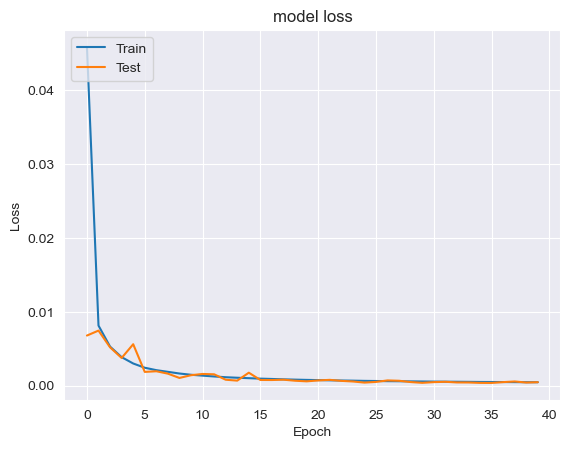

In [69]:
plot_his(history_6)

In [70]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 19s 3ms/step - loss: 4.8463e-04 - rmse: 9.5809e-04 - mae: 4.8463e-04 - mse: 9.1794e-07 - mape: 0.0652


[0.0004846298252232373,
 0.0009580939076840878,
 0.0004846298252232373,
 9.179439075523987e-07,
 0.06521796435117722]

In [71]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_20 (Dense)            (None, 20)                620       
                                                                 
 dense_21 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [72]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [73]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65855.98


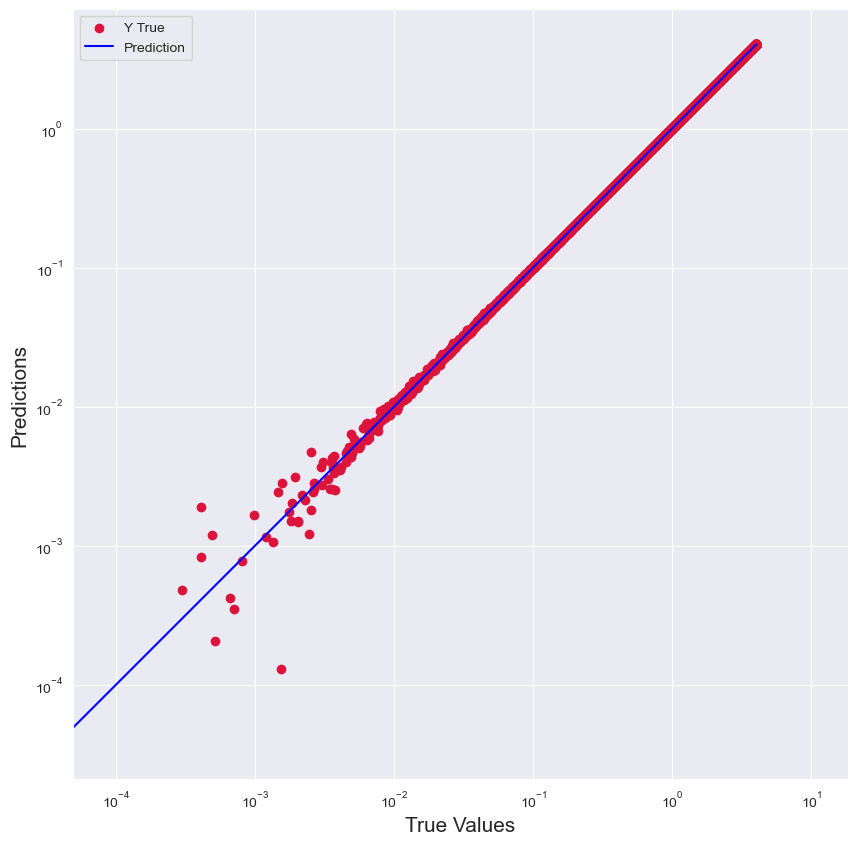

In [146]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_6, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_6), max(Y_test))
p2 = min(min(prediction_6), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [74]:
model_6.save('Saved_models/model_6_Energyesti.h5')

# Model 7

In [77]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(10,activation ='relu'),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 64,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
12436/12436 [==============================] - 76s 6ms/step - loss: 0.1125 - rmse: 0.3861 - mae: 0.1125 - mse: 0.1490 - mape: 140.3853 - val_loss: 0.0251 - val_rmse: 0.0377 - val_mae: 0.0251 - val_mse: 0.0014 - val_mape: 3.4880
Epoch 2/70
12436/12436 [==============================] - 72s 6ms/step - loss: 0.0259 - rmse: 0.0364 - mae: 0.0259 - mse: 0.0013 - mape: 30.0239 - val_loss: 0.0152 - val_rmse: 0.0222 - val_mae: 0.0152 - val_mse: 4.9310e-04 - val_mape: 2.3868
Epoch 3/70
12436/12436 [==============================] - 70s 6ms/step - loss: 0.0172 - rmse: 0.0242 - mae: 0.0172 - mse: 5.8629e-04 - mape: 69.7473 - val_loss: 0.0095 - val_rmse: 0.0166 - val_mae: 0.0095 - val_mse: 2.7641e-04 - val_mape: 1.2097
Epoch 4/70
12436/12436 [==============================] - 74s 6ms/step - loss: 0.0129 - rmse: 0.0193 - mae: 0.0129 - mse: 3.7060e-04 - mape: 49.6586 - val_loss: 0.0103 - val_rmse: 0.0159 - val_mae: 0.0103 - val_mse: 2.5208e-04 - val_mape: 1.1872
Epoch 5/70
12436/12436 [===

12436/12436 [==============================] - 72s 6ms/step - loss: 0.0038 - rmse: 0.0072 - mae: 0.0038 - mse: 5.2505e-05 - mape: 5.5600 - val_loss: 0.0035 - val_rmse: 0.0071 - val_mae: 0.0035 - val_mse: 5.1026e-05 - val_mape: 0.3903
Epoch 35/70
12436/12436 [==============================] - 70s 6ms/step - loss: 0.0038 - rmse: 0.0071 - mae: 0.0038 - mse: 5.0750e-05 - mape: 9.8475 - val_loss: 0.0038 - val_rmse: 0.0071 - val_mae: 0.0038 - val_mse: 5.0996e-05 - val_mape: 0.4797
Epoch 36/70
12436/12436 [==============================] - 71s 6ms/step - loss: 0.0037 - rmse: 0.0070 - mae: 0.0037 - mse: 4.9002e-05 - mape: 7.3601 - val_loss: 0.0035 - val_rmse: 0.0068 - val_mae: 0.0035 - val_mse: 4.6603e-05 - val_mape: 0.2856
Epoch 37/70
12436/12436 [==============================] - 70s 6ms/step - loss: 0.0037 - rmse: 0.0069 - mae: 0.0037 - mse: 4.7443e-05 - mape: 6.1873 - val_loss: 0.0035 - val_rmse: 0.0068 - val_mae: 0.0035 - val_mse: 4.5734e-05 - val_mape: 0.3939
Epoch 38/70
12436/12436 [===

12436/12436 [==============================] - 73s 6ms/step - loss: 0.0023 - rmse: 0.0040 - mae: 0.0023 - mse: 1.5808e-05 - mape: 8.8320 - val_loss: 0.0022 - val_rmse: 0.0039 - val_mae: 0.0022 - val_mse: 1.5274e-05 - val_mape: 0.3595
Epoch 68/70
12436/12436 [==============================] - 73s 6ms/step - loss: 0.0023 - rmse: 0.0039 - mae: 0.0023 - mse: 1.5221e-05 - mape: 12.1678 - val_loss: 0.0021 - val_rmse: 0.0038 - val_mae: 0.0021 - val_mse: 1.4454e-05 - val_mape: 0.2887
Epoch 69/70
12436/12436 [==============================] - 72s 6ms/step - loss: 0.0022 - rmse: 0.0038 - mae: 0.0022 - mse: 1.4650e-05 - mape: 11.8816 - val_loss: 0.0021 - val_rmse: 0.0037 - val_mae: 0.0021 - val_mse: 1.3996e-05 - val_mape: 0.3219
Epoch 70/70
12436/12436 [==============================] - 73s 6ms/step - loss: 0.0022 - rmse: 0.0038 - mae: 0.0022 - mse: 1.4140e-05 - mape: 11.4920 - val_loss: 0.0024 - val_rmse: 0.0038 - val_mae: 0.0024 - val_mse: 1.4507e-05 - val_mape: 0.2590
CPU times: total: 3h 31mi

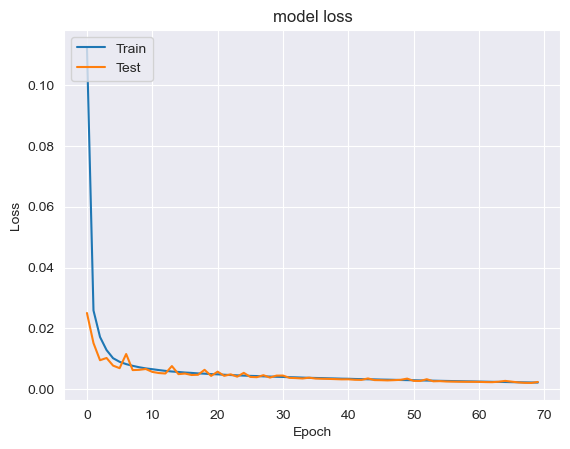

In [78]:
plot_his(history_7)

In [79]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 15s 2ms/step


In [80]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 18s 3ms/step - loss: 0.0024 - rmse: 0.0038 - mae: 0.0024 - mse: 1.4507e-05 - mape: 0.2590


[0.0024024774320423603,
 0.0038088157307356596,
 0.0024024774320423603,
 1.4507078049064148e-05,
 0.2590005099773407]

In [81]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 30)             3840      
                                                                 
 lstm_7 (LSTM)               (None, 10)                1640      
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [82]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11215.978


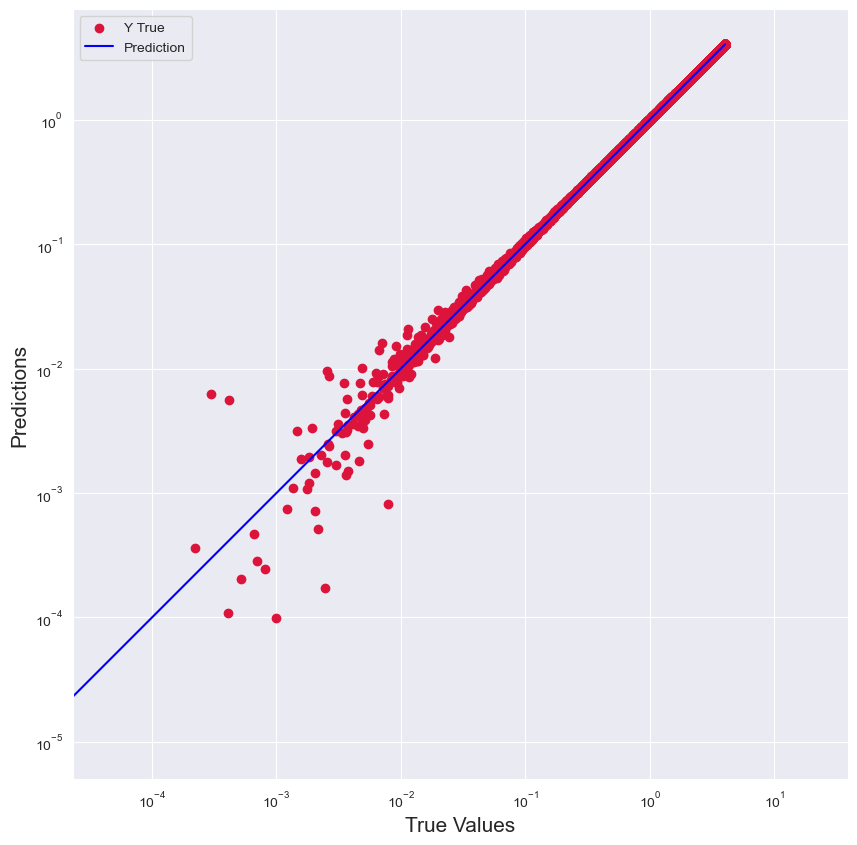

In [145]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_7, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_7), max(Y_test))
p2 = min(min(prediction_7), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [83]:
model_7.save('Saved_models/model_7_Energyesti.h5')

# Model 8

In [84]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 105s 8ms/step - loss: 0.0739 - rmse: 0.3605 - mae: 0.0739 - mse: 0.1300 - mape: 34.7346 - val_loss: 0.0147 - val_rmse: 0.0257 - val_mae: 0.0147 - val_mse: 6.6021e-04 - val_mape: 2.4036
Epoch 2/40
12436/12436 [==============================] - 100s 8ms/step - loss: 0.0138 - rmse: 0.0237 - mae: 0.0138 - mse: 5.6071e-04 - mape: 52.8018 - val_loss: 0.0117 - val_rmse: 0.0221 - val_mae: 0.0117 - val_mse: 4.8944e-04 - val_mape: 1.8238
Epoch 3/40
12436/12436 [==============================] - 99s 8ms/step - loss: 0.0118 - rmse: 0.0214 - mae: 0.0118 - mse: 4.6010e-04 - mape: 45.5837 - val_loss: 0.0107 - val_rmse: 0.0204 - val_mae: 0.0107 - val_mse: 4.1607e-04 - val_mape: 1.7394
Epoch 4/40
12436/12436 [==============================] - 99s 8ms/step - loss: 0.0109 - rmse: 0.0203 - mae: 0.0109 - mse: 4.1334e-04 - mape: 45.3219 - val_loss: 0.0102 - val_rmse: 0.0201 - val_mae: 0.0102 - val_mse: 4.0598e-04 - val_mape: 1.5693
Epoch 5/40
12436/1

12436/12436 [==============================] - 101s 8ms/step - loss: 0.0074 - rmse: 0.0139 - mae: 0.0074 - mse: 1.9273e-04 - mape: 12.4397 - val_loss: 0.0073 - val_rmse: 0.0138 - val_mae: 0.0073 - val_mse: 1.9044e-04 - val_mape: 0.9620
Epoch 35/40
12436/12436 [==============================] - 99s 8ms/step - loss: 0.0073 - rmse: 0.0138 - mae: 0.0073 - mse: 1.9137e-04 - mape: 16.2281 - val_loss: 0.0073 - val_rmse: 0.0137 - val_mae: 0.0073 - val_mse: 1.8796e-04 - val_mape: 0.9758
Epoch 36/40
12436/12436 [==============================] - 100s 8ms/step - loss: 0.0073 - rmse: 0.0138 - mae: 0.0073 - mse: 1.8986e-04 - mape: 16.0723 - val_loss: 0.0073 - val_rmse: 0.0137 - val_mae: 0.0073 - val_mse: 1.8751e-04 - val_mape: 0.9573
Epoch 37/40
12436/12436 [==============================] - 101s 8ms/step - loss: 0.0073 - rmse: 0.0137 - mae: 0.0073 - mse: 1.8858e-04 - mape: 16.6696 - val_loss: 0.0072 - val_rmse: 0.0137 - val_mae: 0.0072 - val_mse: 1.8739e-04 - val_mape: 0.9302
Epoch 38/40
12436/124

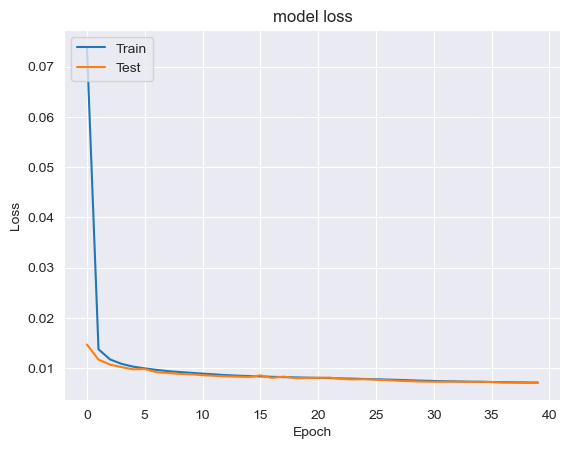

In [85]:
plot_his(history_8)

In [86]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 18s 3ms/step


In [87]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 21s 3ms/step - loss: 0.0071 - rmse: 0.0136 - mae: 0.0071 - mse: 1.8383e-04 - mape: 0.9124


[0.0071263802237808704,
 0.013558408245444298,
 0.0071263802237808704,
 0.00018383044516667724,
 0.9123738408088684]

In [88]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  65855.984


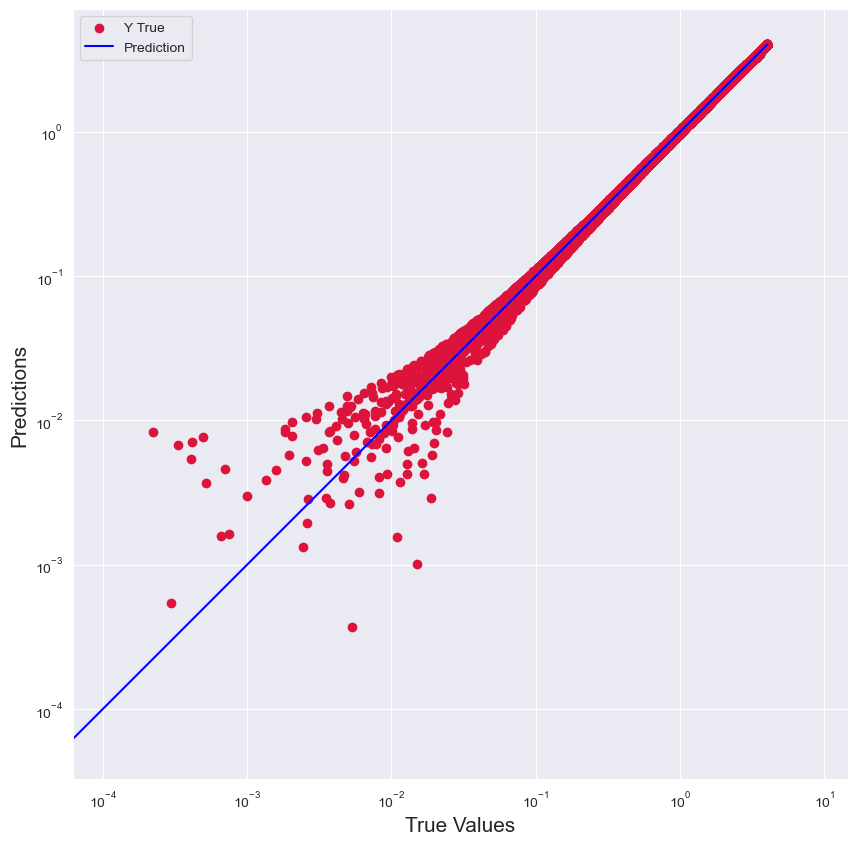

In [144]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_8, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_8), max(Y_test))
p2 = min(min(prediction_8), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [89]:
model_8.save('Saved_models/model_8_Energyesti.h5')

# Model 9

In [223]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(30,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(20,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/80
24872/24872 [==============================] - 39s 2ms/step - loss: 0.1143 - rmse: 0.2443 - mae: 0.1143 - mse: 0.0597 - mape: 187.5937 - val_loss: 0.1071 - val_rmse: 0.2067 - val_mae: 0.1071 - val_mse: 0.0427 - val_mape: 23.6665
Epoch 2/80
24872/24872 [==============================] - 39s 2ms/step - loss: 0.1067 - rmse: 0.2040 - mae: 0.1067 - mse: 0.0416 - mape: 162.7756 - val_loss: 0.1069 - val_rmse: 0.2035 - val_mae: 0.1069 - val_mse: 0.0414 - val_mape: 23.4951
Epoch 3/80
24872/24872 [==============================] - 39s 2ms/step - loss: 0.1066 - rmse: 0.2040 - mae: 0.1066 - mse: 0.0416 - mape: 172.0151 - val_loss: 0.1067 - val_rmse: 0.2045 - val_mae: 0.1067 - val_mse: 0.0418 - val_mape: 23.9517
Epoch 4/80
24872/24872 [==============================] - 39s 2ms/step - loss: 0.1066 - rmse: 0.2040 - mae: 0.1066 - mse: 0.0416 - mape: 168.8482 - val_loss: 0.1068 - val_rmse: 0.2056 - val_mae: 0.1068 - val_mse: 0.0423 - val_mape: 24.1791
Epoch 5/80
24872/24872 [================

In [224]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 5s 863us/step - loss: 0.1066 - rmse: 0.2046 - mae: 0.1066 - mse: 0.0419 - mape: 23.9274


[0.10663663595914841,
 0.2045847475528717,
 0.10663663595914841,
 0.041854921728372574,
 23.92742919921875]

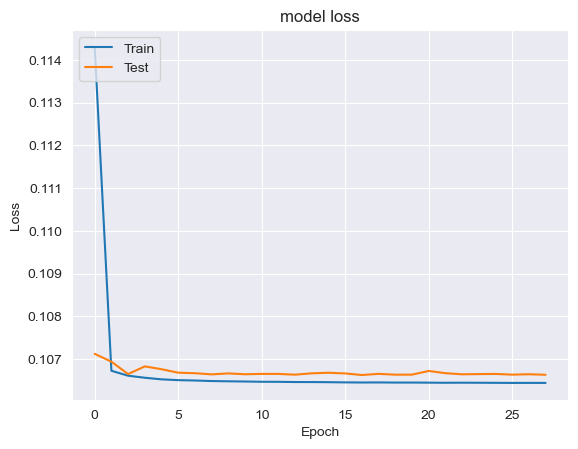

In [225]:
plot_his(history_9)

In [226]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 4s 680us/step


In [227]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  3576.0784


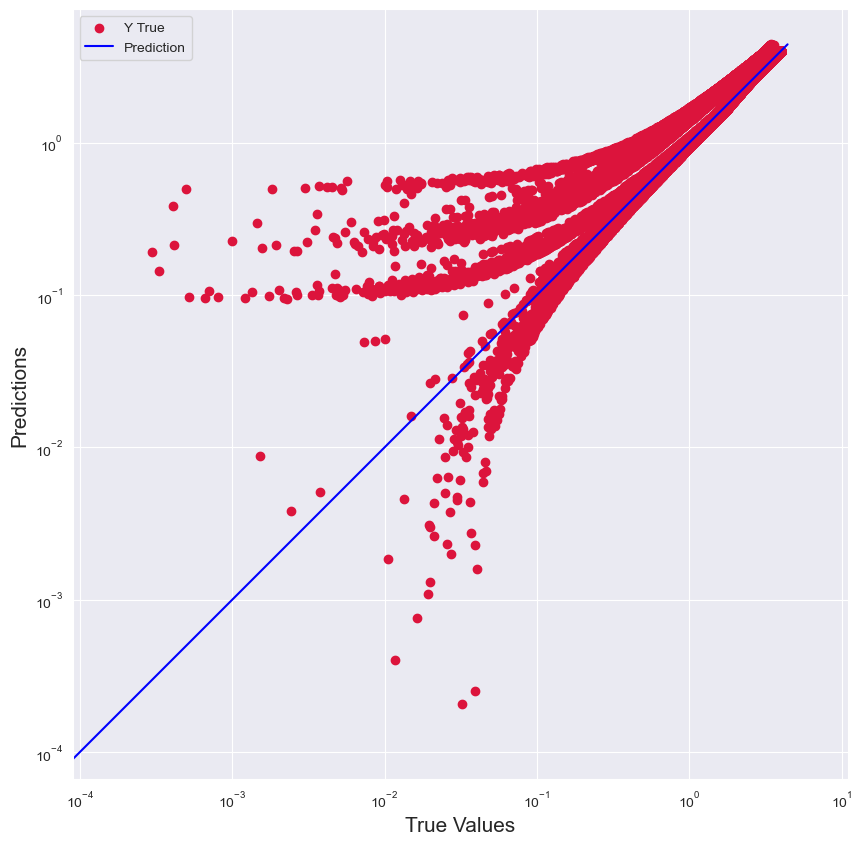

In [228]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_9, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_9), max(Y_test))
p2 = min(min(prediction_9), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [229]:
model_9.save('Saved_models/model_9_Energyesti.h5')

# Model 10

In [202]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(10,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.1165 - rmse: 0.2434 - mae: 0.1165 - mse: 0.0592 - mape: 218.7332 - val_loss: 0.1071 - val_rmse: 0.2047 - val_mae: 0.1071 - val_mse: 0.0419 - val_mape: 23.2833
Epoch 2/100
24872/24872 [==============================] - 49s 2ms/step - loss: 0.1082 - rmse: 0.2038 - mae: 0.1082 - mse: 0.0415 - mape: 151.2975 - val_loss: 0.1080 - val_rmse: 0.2096 - val_mae: 0.1080 - val_mse: 0.0439 - val_mape: 24.6710
Epoch 3/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.1076 - rmse: 0.2039 - mae: 0.1076 - mse: 0.0416 - mape: 177.9445 - val_loss: 0.1081 - val_rmse: 0.2010 - val_mae: 0.1081 - val_mse: 0.0404 - val_mape: 22.6380
Epoch 4/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.1073 - rmse: 0.2039 - mae: 0.1073 - mse: 0.0416 - mape: 179.7487 - val_loss: 0.1069 - val_rmse: 0.2023 - val_mae: 0.1069 - val_mse: 0.0409 - val_mape: 23.5209
Epoch 5/100
24872/24872 [===========

Epoch 34: early stopping
CPU times: total: 48min 44s
Wall time: 30min 27s


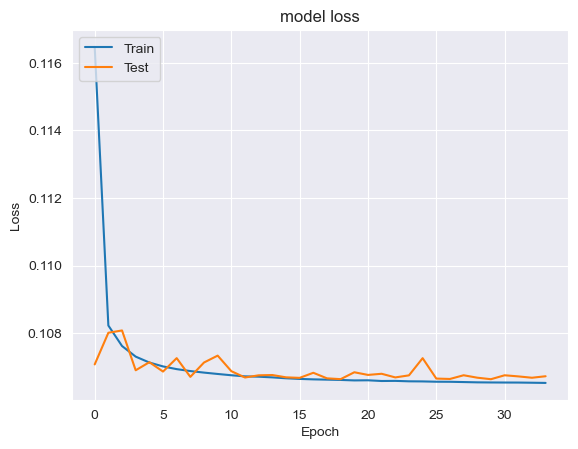

In [203]:
plot_his(history_10)

In [204]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 0.1067 - rmse: 0.2031 - mae: 0.1067 - mse: 0.0413 - mape: 23.6079


[0.10673394799232483,
 0.2031015008687973,
 0.10673394799232483,
 0.04125022143125534,
 23.60791778564453]

In [205]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 6s 849us/step


In [206]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  2888.0708


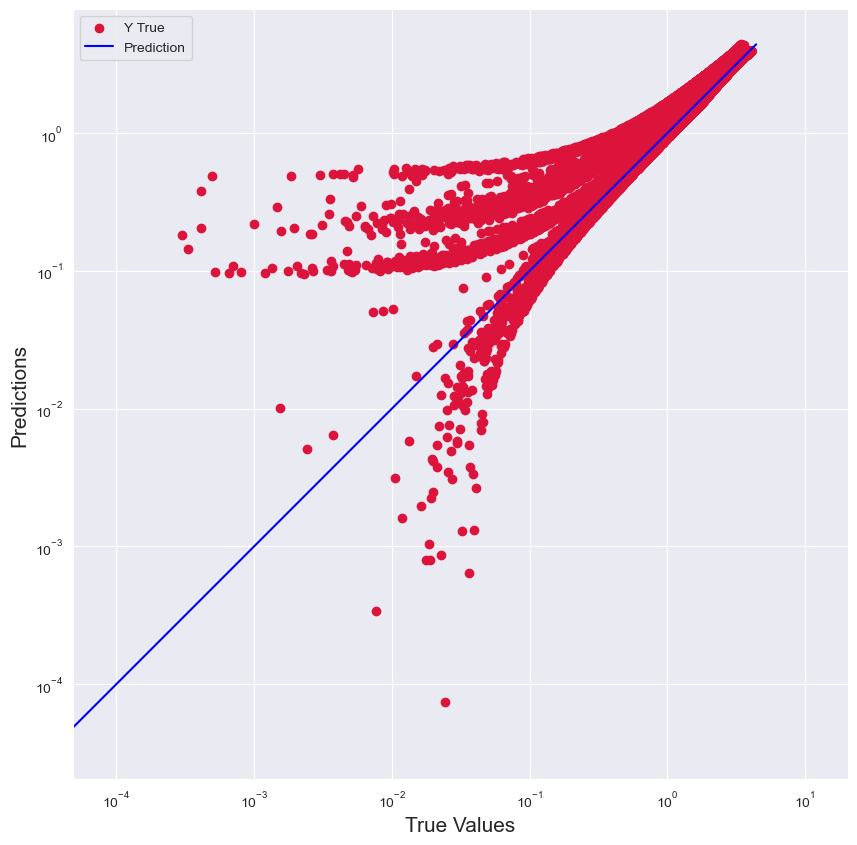

In [207]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_10, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_10), max(Y_test))
p2 = min(min(prediction_10), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [208]:
model_10.save('Saved_models/model_10_Energyesti.h5')

# Model 11

In [209]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(16,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation="linear"),
                               tf.keras.layers.Dense(5,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 49s 2ms/step - loss: 0.9931 - rmse: 1.6662 - mae: 0.9931 - mse: 2.7763 - mape: 350.4811 - val_loss: 0.9119 - val_rmse: 1.5839 - val_mae: 0.9119 - val_mse: 2.5088 - val_mape: 43.2467
Epoch 2/100
24872/24872 [==============================] - 49s 2ms/step - loss: 0.9018 - rmse: 1.5716 - mae: 0.9018 - mse: 2.4698 - mape: 495.0550 - val_loss: 0.8833 - val_rmse: 1.5496 - val_mae: 0.8833 - val_mse: 2.4012 - val_mape: 39.8441
Epoch 3/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.8803 - rmse: 1.5455 - mae: 0.8803 - mse: 2.3886 - mape: 508.6713 - val_loss: 0.8668 - val_rmse: 1.5294 - val_mae: 0.8668 - val_mse: 2.3392 - val_mape: 38.4902
Epoch 4/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.8664 - rmse: 1.5285 - mae: 0.8664 - mse: 2.3365 - mape: 544.1565 - val_loss: 0.8550 - val_rmse: 1.5151 - val_mae: 0.8550 - val_mse: 2.2955 - val_mape: 37.7333
Epoch 5/100
24872/24872 [===========

Epoch 35/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.7794 - rmse: 1.4153 - mae: 0.7794 - mse: 2.0030 - mape: 408.0147 - val_loss: 0.7733 - val_rmse: 1.4082 - val_mae: 0.7733 - val_mse: 1.9829 - val_mape: 32.1336
Epoch 36/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.7783 - rmse: 1.4138 - mae: 0.7783 - mse: 1.9988 - mape: 406.0155 - val_loss: 0.7723 - val_rmse: 1.4067 - val_mae: 0.7723 - val_mse: 1.9787 - val_mape: 32.0686
Epoch 37/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.7772 - rmse: 1.4123 - mae: 0.7772 - mse: 1.9946 - mape: 402.9741 - val_loss: 0.7712 - val_rmse: 1.4052 - val_mae: 0.7712 - val_mse: 1.9746 - val_mape: 31.9960
Epoch 38/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.7762 - rmse: 1.4109 - mae: 0.7762 - mse: 1.9905 - mape: 401.4594 - val_loss: 0.7702 - val_rmse: 1.4038 - val_mae: 0.7702 - val_mse: 1.9707 - val_mape: 31.9441
Epoch 39/100
24872/24872 [======

Epoch 69/100
24872/24872 [==============================] - 37s 1ms/step - loss: 0.7563 - rmse: 1.3831 - mae: 0.7563 - mse: 1.9131 - mape: 370.0275 - val_loss: 0.7507 - val_rmse: 1.3765 - val_mae: 0.7507 - val_mse: 1.8947 - val_mape: 30.8505
Epoch 70/100
24872/24872 [==============================] - 37s 1ms/step - loss: 0.7558 - rmse: 1.3823 - mae: 0.7558 - mse: 1.9109 - mape: 369.2018 - val_loss: 0.7501 - val_rmse: 1.3757 - val_mae: 0.7501 - val_mse: 1.8925 - val_mape: 30.7959
Epoch 71/100
24872/24872 [==============================] - 37s 1ms/step - loss: 0.7552 - rmse: 1.3816 - mae: 0.7552 - mse: 1.9087 - mape: 369.3645 - val_loss: 0.7495 - val_rmse: 1.3749 - val_mae: 0.7495 - val_mse: 1.8903 - val_mape: 30.7781
Epoch 72/100
24872/24872 [==============================] - 37s 2ms/step - loss: 0.7547 - rmse: 1.3808 - mae: 0.7547 - mse: 1.9065 - mape: 368.6703 - val_loss: 0.7490 - val_rmse: 1.3741 - val_mae: 0.7490 - val_mse: 1.8881 - val_mape: 30.7392
Epoch 73/100
24872/24872 [======

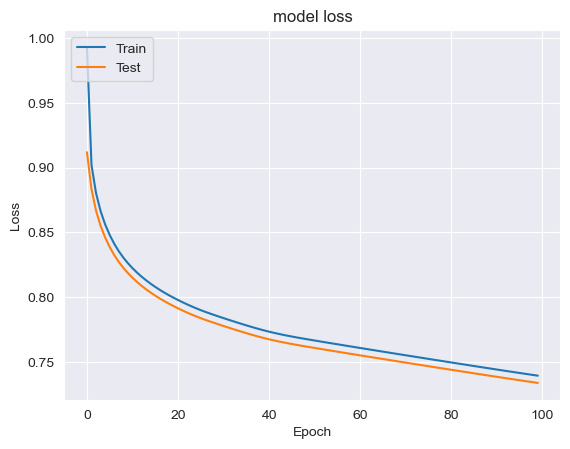

In [210]:
plot_his(history_11)

In [211]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 5s 845us/step - loss: 0.7339 - rmse: 1.3522 - mae: 0.7339 - mse: 1.8283 - mape: 30.1131


[0.7338889837265015,
 1.3521567583084106,
 0.7338889837265015,
 1.8283277750015259,
 30.113109588623047]

In [212]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 5s 676us/step


In [213]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  3519.1082


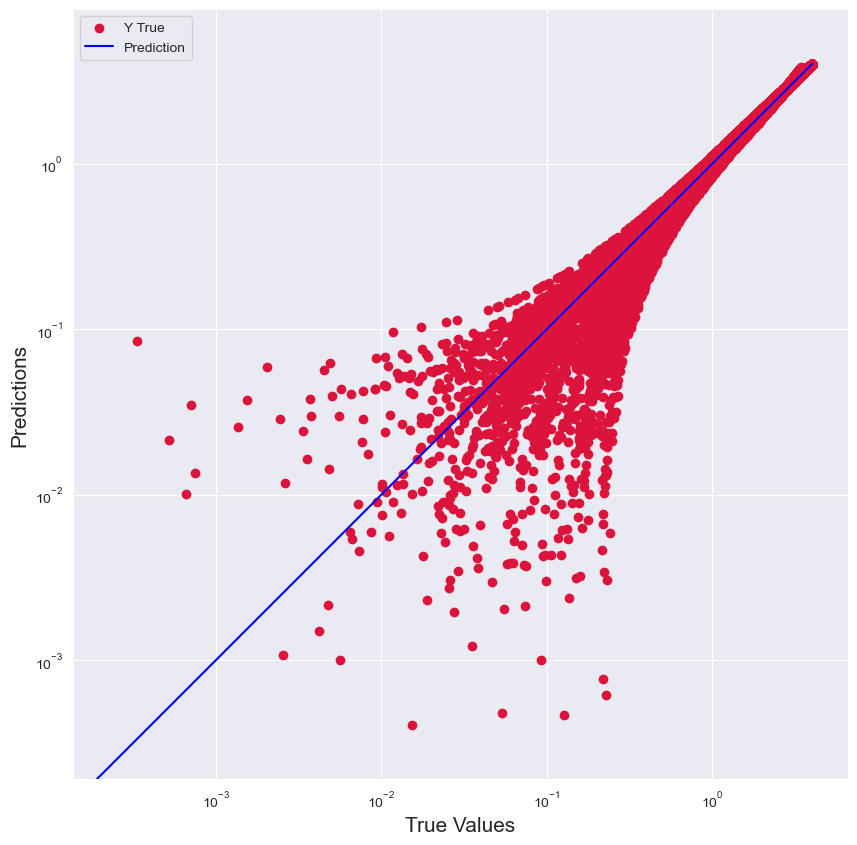

In [214]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_11, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_11), max(Y_test))
p2 = min(min(prediction_11), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [215]:
model_11.save('Saved_models/model_11_Energyesti.h5')

# Model 12

In [216]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(64,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(30),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,batch_size=8,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
99488/99488 [==============================] - 156s 2ms/step - loss: 0.1160 - rmse: 0.2525 - mae: 0.1160 - mse: 0.0637 - mape: 206.1530 - val_loss: 0.1070 - val_rmse: 0.2069 - val_mae: 0.1070 - val_mse: 0.0428 - val_mape: 23.9634
Epoch 2/100
99488/99488 [==============================] - 194s 2ms/step - loss: 0.1068 - rmse: 0.2040 - mae: 0.1068 - mse: 0.0416 - mape: 157.6403 - val_loss: 0.1069 - val_rmse: 0.2053 - val_mae: 0.1069 - val_mse: 0.0421 - val_mape: 24.1519
Epoch 3/100
99488/99488 [==============================] - 223s 2ms/step - loss: 0.1066 - rmse: 0.2040 - mae: 0.1066 - mse: 0.0416 - mape: 182.3422 - val_loss: 0.1067 - val_rmse: 0.2042 - val_mae: 0.1067 - val_mse: 0.0417 - val_mape: 23.7114
Epoch 4/100
99488/99488 [==============================] - 221s 2ms/step - loss: 0.1066 - rmse: 0.2040 - mae: 0.1066 - mse: 0.0416 - mape: 172.8185 - val_loss: 0.1071 - val_rmse: 0.2056 - val_mae: 0.1071 - val_mse: 0.0423 - val_mape: 24.3347
Epoch 5/100
99488/99488 [=======

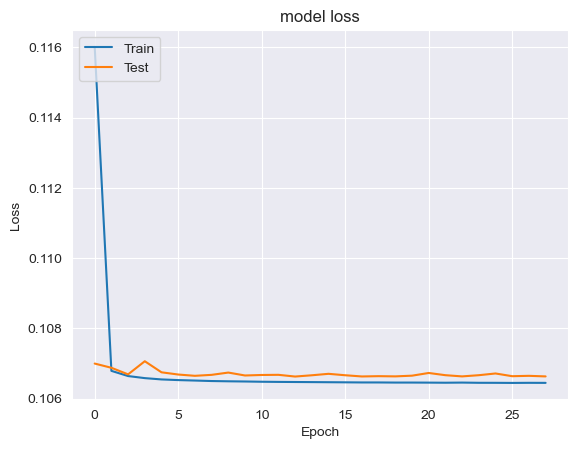

In [217]:
plot_his(history_12)

In [218]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 6s 979us/step - loss: 0.1066 - rmse: 0.2046 - mae: 0.1066 - mse: 0.0419 - mape: 23.9406


[0.10663364082574844,
 0.20463848114013672,
 0.10663364082574844,
 0.041876908391714096,
 23.940584182739258]

In [219]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 4s 703us/step


In [220]:
AIC_value(model_12,prediction_12,Y_test)

AIC:  12876.079


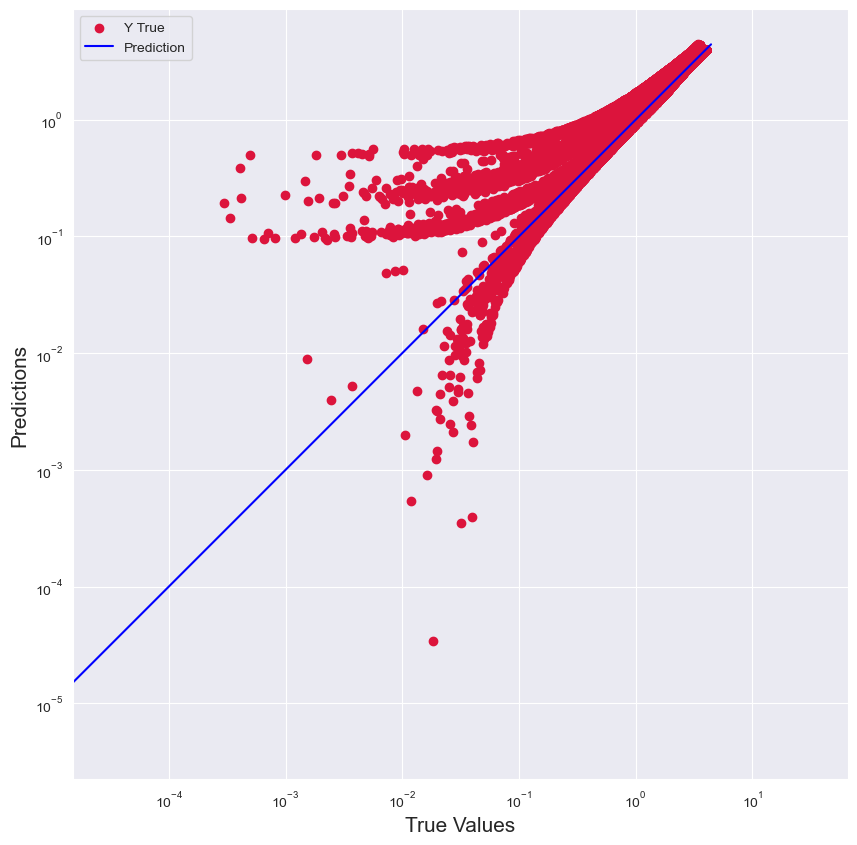

In [221]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_12, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_12), max(Y_test))
p2 = min(min(prediction_12), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [222]:
model_12.save('Saved_models/model_12_Energyesti.h5')